In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numba import njit

In [34]:
dicionário = np.load('cmp_paralelas_reverb.npz',allow_pickle=True)['cmp'].item()

In [3]:
dicionário.keys()

dict_keys(['modelo', 'pulso', 'CMP_X', 'CMP_y'])

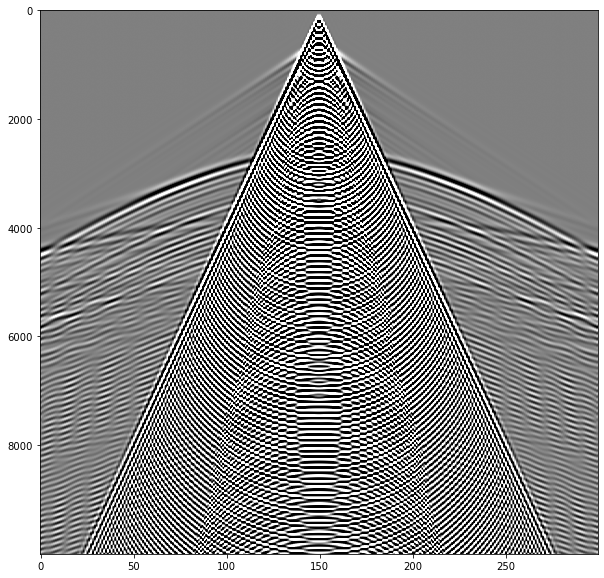

In [24]:
plt.figure(figsize = (10,10))
plt.imshow(dicionário['CMP_X'],cmap='gray',aspect='auto',vmin=-0.001,vmax=0.001)

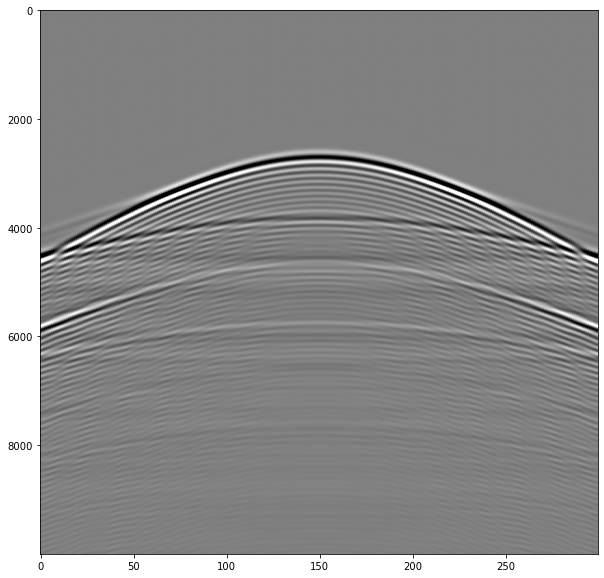

In [30]:
plt.figure(figsize = (10,10))
plt.imshow(dicionário['CMP_y'],cmap='gray',aspect='auto',vmin=-0.001,vmax=0.001)

In [6]:
dicionário['CMP_X'].shape

(10000, 300)

In [7]:
@njit
def sismo(x: int, t: int, v:int, imagem: np.ndarray) -> float:
    x_ = x - imagem.shape[1]/2
    #t_ = int((t+1)*np.sqrt(1+((x_/(v*(t+1)))**2)) - 1)
    t_ =  int((t+1)+(x_**2)/(2*(v**2)*(t+1)) - 1)
    if t_<= imagem.shape[0]:
        return imagem[t_,x]
    else:
        return 0.

In [8]:
@njit(parallel=True)
def obter_espectro_velocidades(imagem: np.ndarray) -> np.ndarray:
    espectro = np.zeros((imagem.shape[0],5000))
    for t in range(imagem.shape[0]):
#        print(t, end=' ')
#        if t%25==24: print('')
        for v in range(5000):
            soma = 0
            for x in range(imagem.shape[1]):
                #soma += sismo(x, t, v, imagem)
                x_ = (x - imagem.shape[1]/2)*10
                v_ = (v+1)
                t_ = (t+1)*0.0006
#                t_ = int((t+1)*np.sqrt(1+((x_/((v+1)*(t+1)))**2)) - 1)
#                t_ = int((t+1)*np.sqrt(((v+1)**2)+((x_/((t+1)))**2)) - 1)
                t__ = int((t_*np.sqrt(1+((x_/(v_*t_))**2))/0.0006)-1)
                if t__< imagem.shape[0]:
                    soma += imagem[t__,x]
            espectro[t,v]=soma
    return espectro

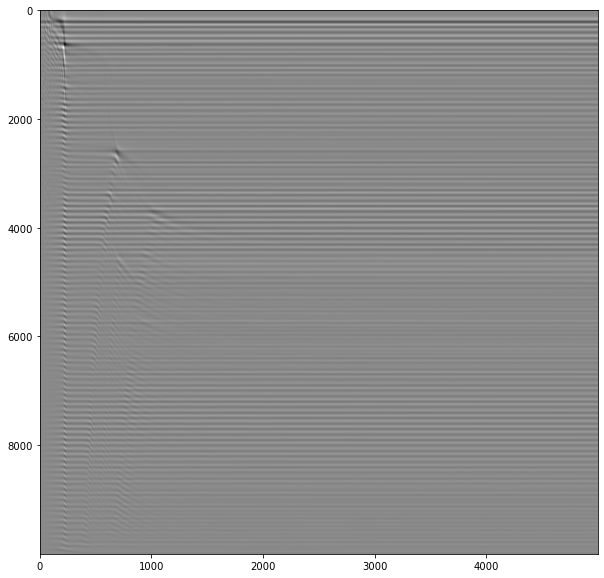

In [27]:
cmp_X = dicionário['CMP_X']
espectro_X = obter_espectro_velocidades(cmp_X)
plt.figure(figsize = (10,10))
plt.imshow(espectro_X,cmap='gray',aspect='auto')

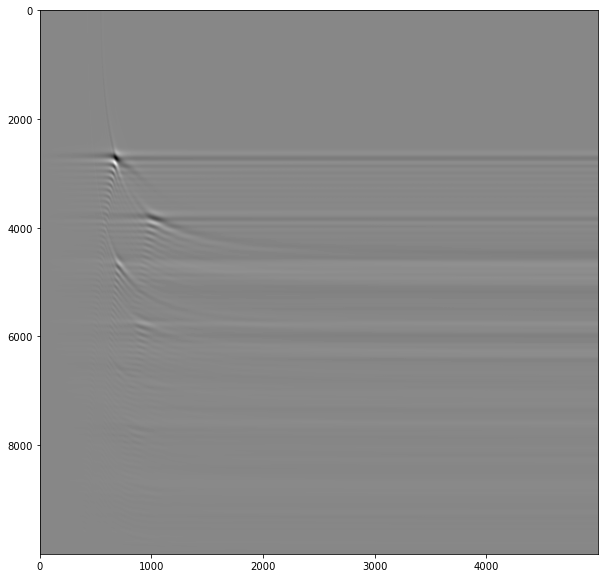

In [31]:
cmp_y = dicionário['CMP_y']
espectro_y = obter_espectro_velocidades(cmp_y)
plt.figure(figsize = (10,10))
plt.imshow(espectro_y,cmap='gray',aspect='auto')

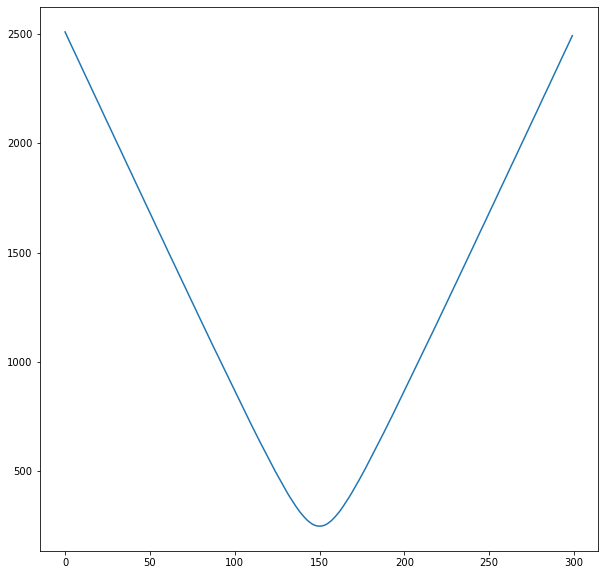

In [11]:
#@njit(parallel=True)
def hiperboles_das_velocidades() -> np.ndarray:
    espectro = np.zeros(300)
    t = 250 
    v = 1000
    for x in range(300):
        #soma += sismo(x, t, v, imagem)
        x_ = (x - 150)*10
        v_ = (v+1)
        t_ = (t+1)*0.0006
        t__ = int((t_*np.sqrt(1+((x_/(v_*t_))**2))/0.0006)-1)
        espectro[x]=t__
    return espectro
plt.figure(figsize = (10,10))
#plt.imshow(hiperboles_das_velocidades(),cmap='gray',aspect='auto')
plt.plot(hiperboles_das_velocidades())

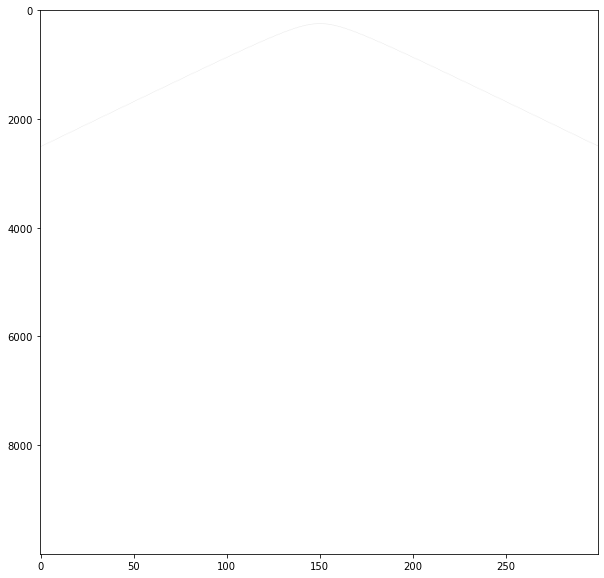

In [12]:
def plot_das_velocidades() -> np.ndarray:
    espectro = np.zeros((10000,300))
    t = 250 
    v = 1000
    for x in range(300):
        #soma += sismo(x, t, v, imagem)
        x_ = (x - 150)*10
        v_ = (v+1)
        t_ = (t+1)*0.0006
        t__ = int((t_*np.sqrt(1+((x_/(v_*t_))**2))/0.0006)-1)
        if t__ < 10000:
            espectro[t__,x]=1
    return espectro
plt.figure(figsize = (10,10))
plt.imshow(plot_das_velocidades(),cmap='binary',aspect='auto',vmax=1,vmin=0)

In [13]:
def obter_fk(imagem: np.ndarray) -> np.ndarray:
    return np.log(abs(np.fft.fftshift(np.fft.fft2(imagem))))

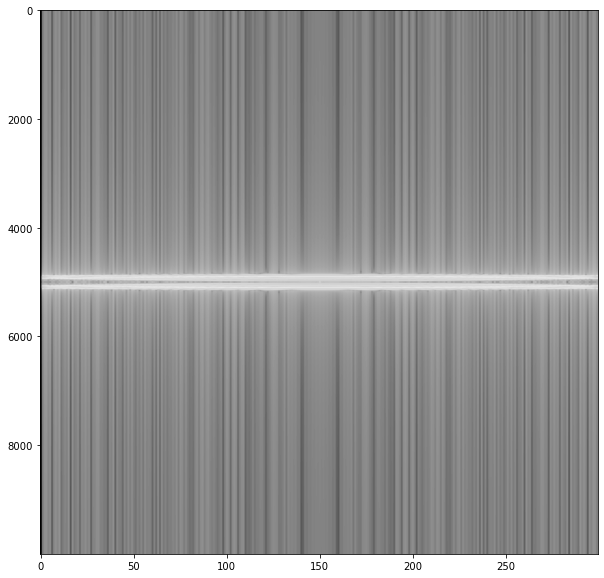

In [36]:
plt.figure(figsize = (10,10))
plt.imshow(obter_fk(cmp_X),cmap='gray',aspect='auto')

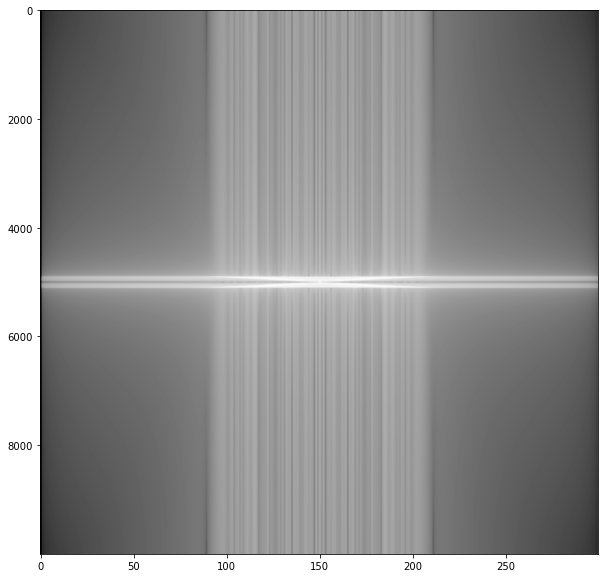

In [35]:
plt.figure(figsize = (10,10))
plt.imshow(obter_fk(cmp_y),cmap='gray',aspect='auto')